In [2]:
import glob
from os.path import join, splitext, basename
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import trading as trd

In [4]:
# relaod module after modifying it
import importlib
importlib.reload(trd)

<module 'trading' from 'C:\\Users\\hamza\\Documents\\school\\cs_229\\cs229_final_project\\src\\trading\\__init__.py'>

In [9]:
STOCK_DATA_DIR = join('..', 'data', 'stocks')
HI_BETA_DIR = join(STOCK_DATA_DIR, 'high_beta')
LO_BETA_DIR = join(STOCK_DATA_DIR, 'low_beta')

high_beta = ['APA', 'ETFC', 'MU', 'WDC', 'WMB']
low_beta = ['FDP', 'AWK', 'BMY',  'CPB', 'WEC']

start_date = np.datetime64('2011-01-01')

In [10]:
trd.download_stock_histories(HI_BETA_DIR, high_beta, start_date)

In [11]:
trd.download_stock_histories(LO_BETA_DIR, low_beta, start_date)

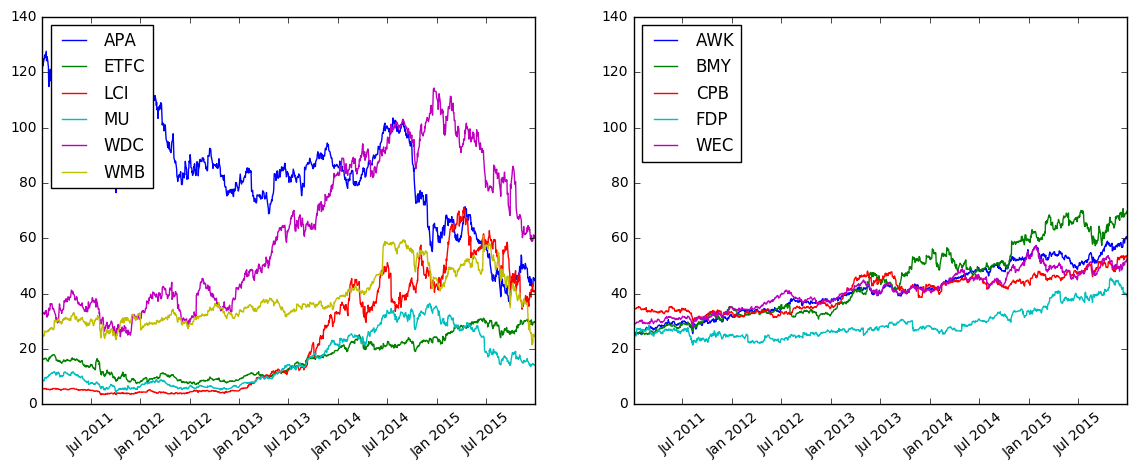

In [12]:
f = plt.figure(figsize=(14, 5))

#
# hi-beta stocks
#
stock_files = glob.glob(join(HI_BETA_DIR, '*.csv'))

ax1 = plt.subplot(1, 2, 1)
for f in stock_files: 
    s = splitext(basename(f))[0]
    c = trd.read_stock_history(f)
    
    ax1.plot_date(c.index, c, label=s, ls='solid', marker='')

plt.xticks(rotation=40)
ax1.legend(loc='upper left')

#
#lo-beta stocks
#
stock_files = glob.glob(join(LO_BETA_DIR, '*.csv'))

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
for f in stock_files: 
    s = splitext(basename(f))[0]
    c = trd.read_stock_history(f)
    
    ax2.plot_date(c.index, c, label=s, ls='solid', marker='')

plt.xticks(rotation=40)
ax2.legend(loc='upper left')